
0: 1376x2048 1 person, 21 boats, 13.3ms
Speed: 14.0ms preprocess, 13.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1376, 2048)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([8.], device='cuda:0')
conf: tensor([0.9116], device='cuda:0')
data: tensor([[747.7360, 471.0970, 857.0865, 554.5297,   0.9116,   8.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 960)
shape: torch.Size([1, 6])
xywh: tensor([[802.4113, 512.8134, 109.3506,  83.4327]], device='cuda:0')
xywhn: tensor([[0.8358, 0.8013, 0.1139, 0.1304]], device='cuda:0')
xyxy: tensor([[747.7360, 471.0970, 857.0865, 554.5297]], device='cuda:0')
xyxyn: tensor([[0.7789, 0.7361, 0.8928, 0.8665]], device='cuda:0')
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([8.], device='cuda:0')
conf: tensor([0.8856], device='cuda:0')
data: tensor([[309.4903, 474.1728, 350.5951, 541.2071,   0.8856,   8.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 960)
s

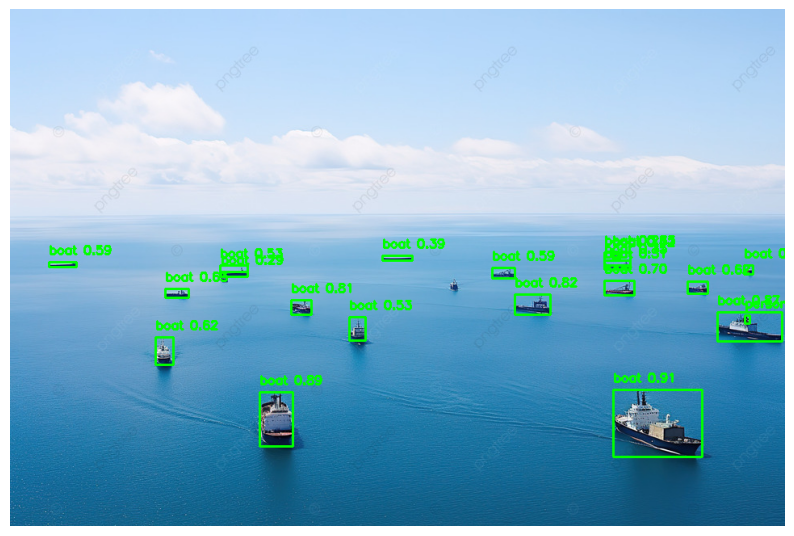

True

In [26]:
from ultralytics import YOLO
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load the Pre-trained YOLO model
model = YOLO('yolo11n.pt')  # Use 'yolov8n.pt' (nano), 'yolov8s.pt' (small), etc.

# Step 2: Define the function for detection and visualization
def detect_and_visualize(image_path, model):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Perform inference
    results = model.predict(source=image_rgb, save=False, conf=0.25, imgsz=2048)

    # Extract detections
    for result in results[0].boxes:
        print(result)
        # Bounding box coordinates
        x1, y1, x2, y2 = map(int, result.xyxy[0].cpu().numpy())
        conf = result.conf[0].cpu().numpy()
        cls = int(result.cls[0].cpu().numpy())
        label = model.names[cls]

        # Draw the bounding box and label
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert back to RGB for displaying
    image_with_boxes = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_with_boxes

# Step 3: Provide an input image and visualize
input_image_path = "barcos.jpeg"  # Path to your image
output_image = detect_and_visualize(input_image_path, model)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis("off")
plt.show()

# Optional: Save the output
cv2.imwrite("output_with_detections.jpg", cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))

In [1]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 17.3 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
